# Face Detection and Recognition

Face detection finds faces in photos or video frames while facial recognition identifyis the faces detected.

## Face Detection with Viola-Jones

One of the fastest and most popular algorithms for detecting faces in photos. The algorithm keys on the relative intensities of adjacent blocks of pixels. For example the average pixel intensity in a rectangle around the eyes is typically darker than the average pixel intensity in a rectangle immediately below that area. The presence of many such Haar-like features in a frame at the right locations is an indicator that the frame contains a face. Viola-Jones works by sliding windows of various sizes over an image looking for frames with Haar-like features in the right places. At each stop, the pixels in the window are scaled to a specified size (typically 24 x 24) and features are extracted and fed into a binary classifier that returns positive indicating the frame contains a face or negative indicating it does not. A frame of 24x24 pixels contains more than 160.000 combinations of rectangles representing potential Haar-like features. The model computes only those that the classifier requires. The classifier is several binary classifiers arranged in stages, the first stage requires only one feature, the second might require 10 features and the third might require 20 features and features are extracted and passed to the next stage only if the previous stage returns a positive result giving rise to the term cascade classifier. This is a design pattern known as high recall then percison because individual stages are tuned for high recall but the cumulative effect is one of high percision.

## Using OpenCV implementation of Viola-Jones

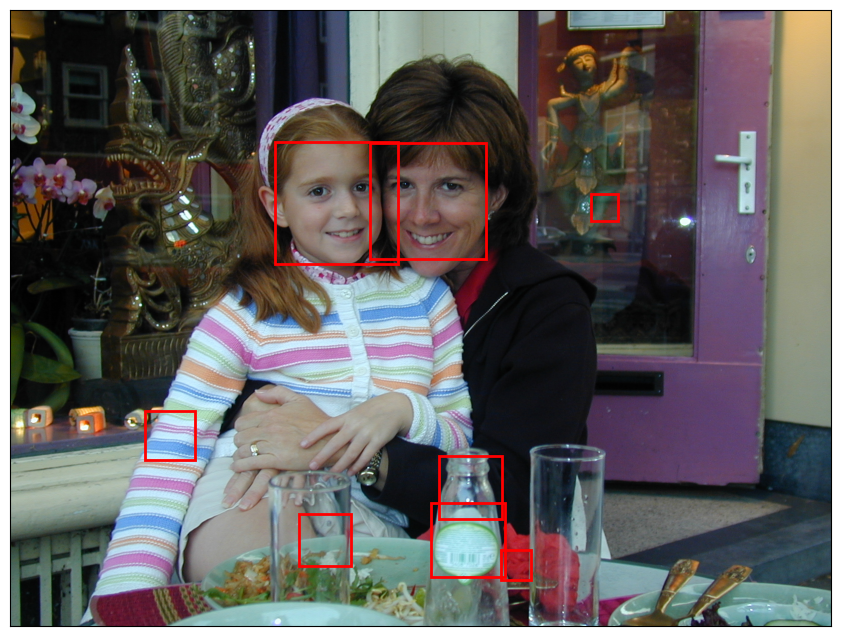

In [4]:
import cv2
from cv2 import CascadeClassifier
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
%matplotlib inline

image = plt.imread('Data/Amsterdam.jpg')
fig, ax = plt.subplots(figsize=(12,8), subplot_kw={'xticks': [], 'yticks':[]})
ax.imshow(image)

model = CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = model.detectMultiScale(image)

for face in faces:
    x, y, w, h = face
    rect = Rectangle((x,y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)

CascadeClassifier detected two faces but has a numger of false positives. One way to fix this is to use the minNeighbors parameter, the default is 3 but incereasing it makes the CascadeClassifier more selective.

In [5]:
faces = model.detectMultiScale(image, minNeighbors=20)

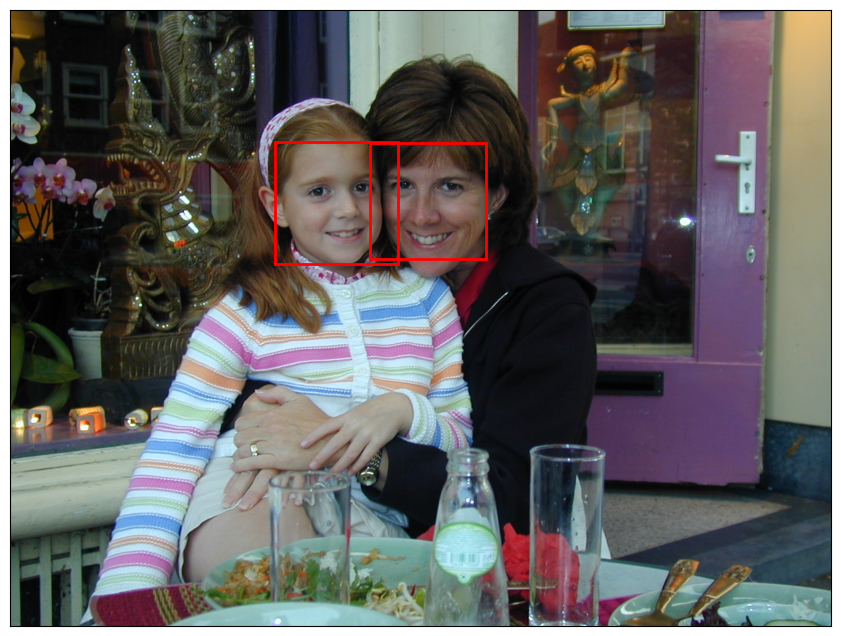

In [7]:
fig, ax = plt.subplots(figsize=(12,8), subplot_kw={'xticks': [], 'yticks':[]})
ax.imshow(image)

for face in faces:
    x, y, w, h = face
    rect = Rectangle((x,y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)